In [ ]:
Veri Seti: Breast Cancer Wisconsin (Diagnostic)
Veri seti, Breast Cancer Wisconsin (Diagnostic), gÃ¶ÄŸÃ¼s kanseri teÅŸhisi iÃ§in kullanÄ±lan Ã¶zelliklere dayalÄ± bir sÄ±nÄ±flandÄ±rma problemidir. Veri seti, aÅŸaÄŸÄ±daki Ã¶zellikleri iÃ§eriyor:

Ã–zellikler:
Radyolojik Ã–lÃ§Ã¼mler: Veriler, gÃ¶ÄŸÃ¼s kanseri hÃ¼crelerinden alÄ±nan Ã¶zelliklerin sayÄ±sal Ã¶lÃ§Ã¼mleridir. Bu Ã¶zellikler, kanserin malign (kÃ¶tÃ¼ huylu) veya benign (iyi huylu) olup olmadÄ±ÄŸÄ±nÄ± anlamak iÃ§in kullanÄ±lÄ±r.

Her bir Ã¶rnek (satÄ±r), kanserli bir dokuya ait Ã¶zellikler hakkÄ±nda bilgi iÃ§erir.

Ã–znitelikler:

Radius (YarÄ±Ã§ap): HÃ¼crelerin bÃ¼yÃ¼klÃ¼ÄŸÃ¼nÃ¼ Ã¶lÃ§er.

Texture (Doku): HÃ¼crenin yÃ¼zey yapÄ±sÄ±nÄ± Ã¶lÃ§er.

Perimeter (Ã‡evre): HÃ¼crenin dÄ±ÅŸ sÄ±nÄ±rÄ±nÄ± Ã¶lÃ§er.

Area (Alan): HÃ¼crenin kapladÄ±ÄŸÄ± alan.

Smoothness (YumuÅŸaklÄ±k): HÃ¼crenin pÃ¼rÃ¼zlÃ¼lÃ¼ÄŸÃ¼nÃ¼ Ã¶lÃ§er.

Compactness (SÄ±kÄ±lÄ±k): HÃ¼crenin ne kadar yoÄŸun olduÄŸunu Ã¶lÃ§er.

Concavity (Ã‡Ã¶kÃ¼klÃ¼k): HÃ¼crenin kenarlarÄ±nÄ±n ne kadar Ã§Ã¶kÃ¼k olduÄŸunu Ã¶lÃ§er.

Symmetry (SÃ¶ndÃ¼rme): HÃ¼crenin simetrisini Ã¶lÃ§er.

Fractal Dimension (Fraktal Boyut): HÃ¼crenin karmaÅŸÄ±klÄ±ÄŸÄ±nÄ± Ã¶lÃ§er.

Hedef DeÄŸiÅŸken (Target):
Diagnosis (TeÅŸhis): Verinin hedef deÄŸiÅŸkenidir. Bu deÄŸiÅŸken, B (Benign) yani iyi huylu ve M (Malignant) yani kÃ¶tÃ¼ huylu olarak etiketlenmiÅŸtir.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           f1_score, precision_score, recall_score, roc_curve, auc,
                           precision_recall_curve)
from sklearn.preprocessing import LabelBinarizer
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Plotting ayarlarÄ±
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("BREAST CANCER WISCONSIN DIAGNOSTIC DATASET ANALYSIS")
print("Decision Tree Based Classification")
print("="*60)

BREAST CANCER WISCONSIN DIAGNOSTIC DATASET ANALYSIS
Decision Tree Based Classification


In [22]:
# =============================================================================
# 1. VERÄ° YÃœKLEME VE KEÅžFÄ°
# =============================================================================

print("\n1. VERÄ° YÃœKLEME VE KEÅžÄ°F")
print("-" * 40)

# Veri setini yÃ¼kleme
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print(f"Veri seti boyutu: {X.shape}")
print(f"Ã–zellik sayÄ±sÄ±: {X.shape[1]}")
print(f"Ã–rnek sayÄ±sÄ±: {X.shape[0]}")

# Hedef deÄŸiÅŸken analizi
print(f"\nHedef deÄŸiÅŸken daÄŸÄ±lÄ±mÄ±:")
print(y.value_counts())
print(f"\nHedef deÄŸiÅŸken oranlarÄ±:")
print(y.value_counts(normalize=True).round(4))

# Temel istatistikler
print(f"\nVeri setinin ilk 5 satÄ±rÄ±:")
print(X.head())


1. VERÄ° YÃœKLEME VE KEÅžÄ°F
----------------------------------------
Veri seti boyutu: (569, 30)
Ã–zellik sayÄ±sÄ±: 30
Ã–rnek sayÄ±sÄ±: 569

Hedef deÄŸiÅŸken daÄŸÄ±lÄ±mÄ±:
Diagnosis
B            357
M            212
Name: count, dtype: int64

Hedef deÄŸiÅŸken oranlarÄ±:
Diagnosis
B            0.6274
M            0.3726
Name: proportion, dtype: float64

Veri setinin ilk 5 satÄ±rÄ±:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.0701

In [23]:
# =============================================================================
# 2. VERÄ° Ã–N Ä°ÅžLEME
# =============================================================================

print("\n2. VERÄ° Ã–N Ä°ÅžLEME")
print("-" * 40)

# Eksik deÄŸer kontrolÃ¼
print(f"Eksik deÄŸer sayÄ±sÄ±: {X.isnull().sum().sum()}")
print(f"Hedef deÄŸiÅŸkende eksik deÄŸer: {y.isnull().sum().sum()}")

# EÄŸitim ve test setlerine ayÄ±rma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEÄŸitim seti boyutu: {X_train.shape[0]} Ã¶rnek")
print(f"Test seti boyutu: {X_test.shape[0]} Ã¶rnek")
print(f"EÄŸitim seti hedef daÄŸÄ±lÄ±mÄ±:\n{y_train.value_counts()}")
print(f"Test seti hedef daÄŸÄ±lÄ±mÄ±:\n{y_test.value_counts()}")


2. VERÄ° Ã–N Ä°ÅžLEME
----------------------------------------
Eksik deÄŸer sayÄ±sÄ±: 0
Hedef deÄŸiÅŸkende eksik deÄŸer: 0

EÄŸitim seti boyutu: 455 Ã¶rnek
Test seti boyutu: 114 Ã¶rnek
EÄŸitim seti hedef daÄŸÄ±lÄ±mÄ±:
Diagnosis
B            285
M            170
Name: count, dtype: int64
Test seti hedef daÄŸÄ±lÄ±mÄ±:
Diagnosis
B            72
M            42
Name: count, dtype: int64


In [24]:
# =============================================================================
# 3. MODEL OLUÅžTURMA VE EÄžÄ°TÄ°M
# =============================================================================

print("\n3. MODEL OLUÅžTURMA VE EÄžÄ°TÄ°M")
print("-" * 40)

# Temel Decision Tree modeli
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Hyperparameter tuning iÃ§in Grid Search
print("Hyperparameter optimizasyonu yapÄ±lÄ±yor...")
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
# En iyi parametrelerle model
best_dt = grid_search.best_estimator_
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi CV skoru: {grid_search.best_score_:.4f}")


3. MODEL OLUÅžTURMA VE EÄžÄ°TÄ°M
----------------------------------------
Hyperparameter optimizasyonu yapÄ±lÄ±yor...
En iyi parametreler: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
En iyi CV skoru: nan


In [25]:
# =============================================================================
# 4. MODEL DEÄžERLENDÄ°RME
# =============================================================================

print("\n4. MODEL DEÄžERLENDÄ°RME")
print("-" * 40)

# Tahminler
y_pred_basic = dt_classifier.predict(X_test)
y_pred_best = best_dt.predict(X_test)
y_pred_proba_basic = dt_classifier.predict_proba(X_test)[:, 1]
y_pred_proba_best = best_dt.predict_proba(X_test)[:, 1]

# Temel metrikleri hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} SonuÃ§larÄ±:")
    print("-" * 30)
    
    # Confusion Matrix deÄŸerleri
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Temel metrikler
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='M')
    recall = recall_score(y_true, y_pred, pos_label='M')  # Sensitivity
    f1 = f1_score(y_true, y_pred, pos_label='M')
    specificity = tn / (tn + fp)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Detailed Classification Report
    print(f"\nDetaylÄ± Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))
    
    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'specificity': specificity, 'f1': f1, 'cm': cm
    }

# Model karÅŸÄ±laÅŸtÄ±rmasÄ±
basic_metrics = calculate_metrics(y_test, y_pred_basic, "Temel Decision Tree")
best_metrics = calculate_metrics(y_test, y_pred_best, "Optimize EdilmiÅŸ Decision Tree")



4. MODEL DEÄžERLENDÄ°RME
----------------------------------------

Temel Decision Tree SonuÃ§larÄ±:
------------------------------
Accuracy: 0.9298
Precision: 0.9048
Recall (Sensitivity): 0.9048
Specificity: 0.9444
F1-Score: 0.9048

DetaylÄ± Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        72
   Malignant       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Optimize EdilmiÅŸ Decision Tree SonuÃ§larÄ±:
------------------------------
Accuracy: 0.9035
Precision: 0.9429
Recall (Sensitivity): 0.7857
Specificity: 0.9722
F1-Score: 0.8571

DetaylÄ± Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.97      0.93        72
   Malignant       0.94      0.79      0.86        42

    accuracy                    


5. GÃ–RSELLEÅžTÄ°RMELER OLUÅžTURULUYOR...
----------------------------------------


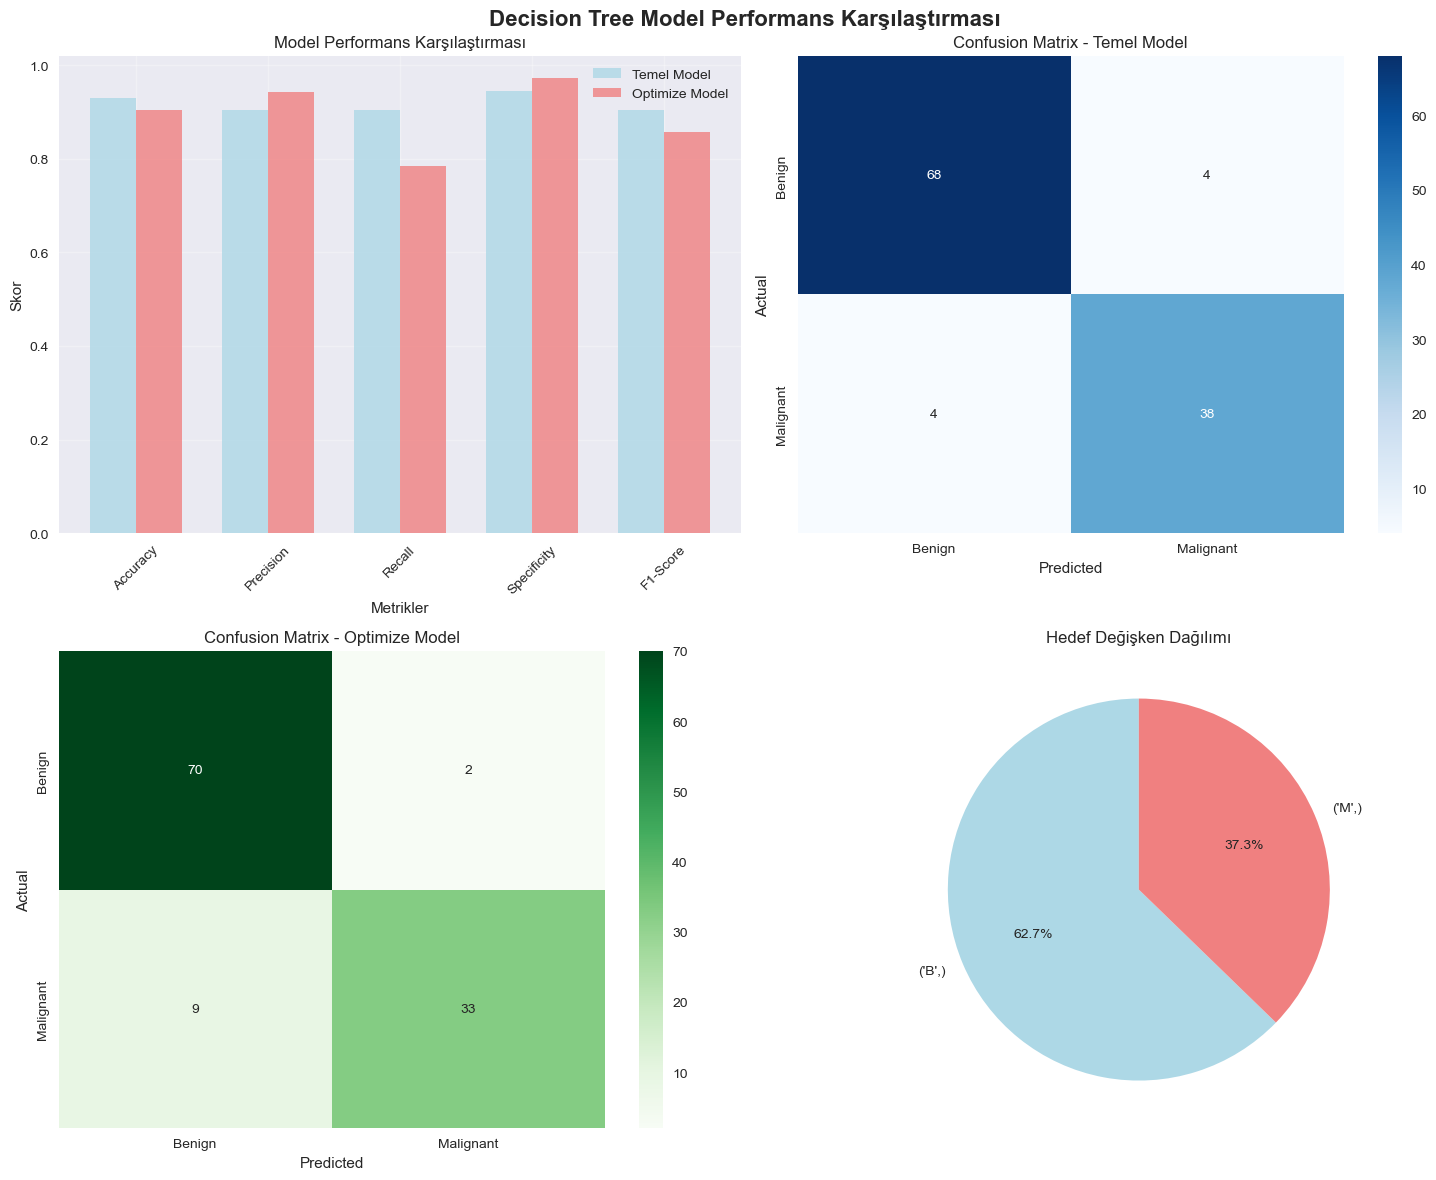

In [27]:
# =============================================================================
# 5. GÃ–RSELLEÅžTÄ°RMELER
# =============================================================================

print("\n5. GÃ–RSELLEÅžTÄ°RMELER OLUÅžTURULUYOR...")
print("-" * 40)

# Figure 1: Model KarÅŸÄ±laÅŸtÄ±rma Metrikleri
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Decision Tree Model Performans KarÅŸÄ±laÅŸtÄ±rmasÄ±', fontsize=16, fontweight='bold')

# Metrik karÅŸÄ±laÅŸtÄ±rmasÄ±
metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
basic_values = [basic_metrics['accuracy'], basic_metrics['precision'], 
                basic_metrics['recall'], basic_metrics['specificity'], basic_metrics['f1']]
best_values = [best_metrics['accuracy'], best_metrics['precision'], 
               best_metrics['recall'], best_metrics['specificity'], best_metrics['f1']]

x = np.arange(len(metrics_names))
width = 0.35

axes[0,0].bar(x - width/2, basic_values, width, label='Temel Model', alpha=0.8, color='lightblue')
axes[0,0].bar(x + width/2, best_values, width, label='Optimize Model', alpha=0.8, color='lightcoral')
axes[0,0].set_xlabel('Metrikler')
axes[0,0].set_ylabel('Skor')
axes[0,0].set_title('Model Performans KarÅŸÄ±laÅŸtÄ±rmasÄ±')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(metrics_names, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
# Confusion Matrix - Temel Model
sns.heatmap(basic_metrics['cm'], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix - Temel Model')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Confusion Matrix - Optimize Model
sns.heatmap(best_metrics['cm'], annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=axes[1,0])
axes[1,0].set_title('Confusion Matrix - Optimize Model')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# Hedef deÄŸiÅŸken daÄŸÄ±lÄ±mÄ±
y_counts = y.value_counts()
axes[1,1].pie(y_counts.values, labels=y_counts.index, autopct='%1.1f%%', 
              colors=['lightblue', 'lightcoral'], startangle=90)
axes[1,1].set_title('Hedef DeÄŸiÅŸken DaÄŸÄ±lÄ±mÄ±')

plt.tight_layout()
plt.show()

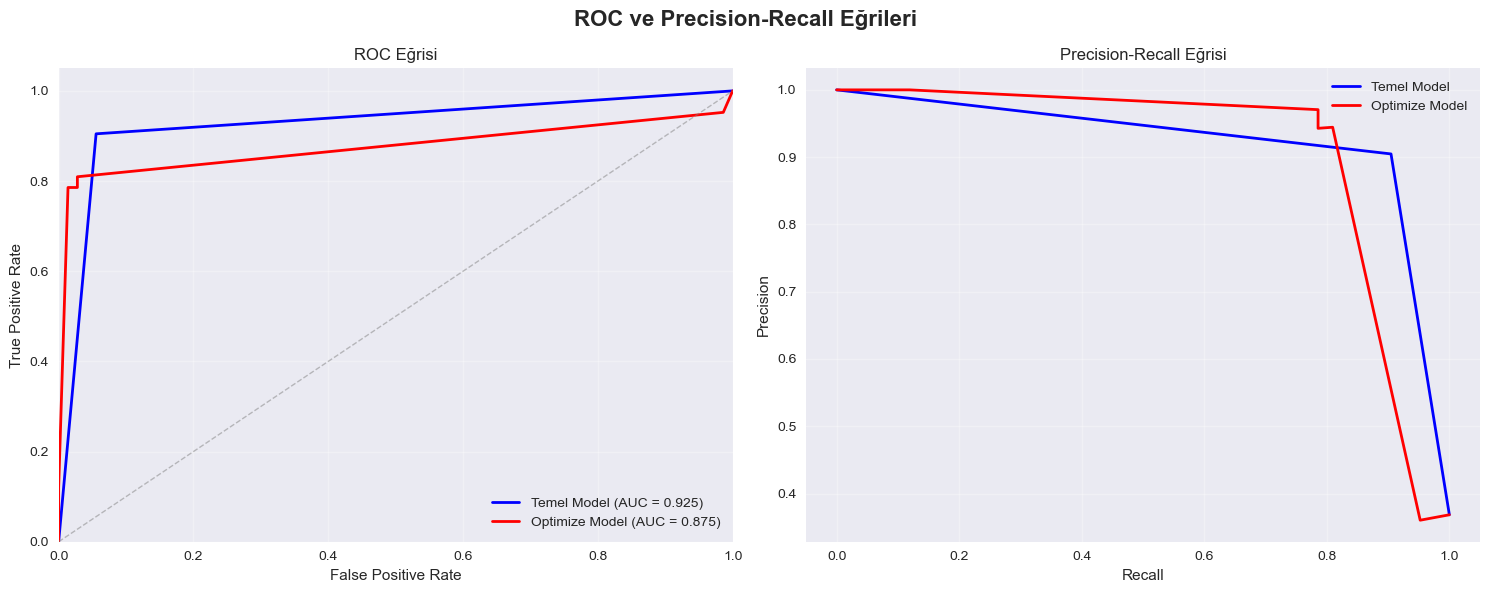

In [29]:
# Figure 2: ROC ve Precision-Recall EÄŸrileri
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ROC ve Precision-Recall EÄŸrileri', fontsize=16, fontweight='bold')

# ROC Curve
# Label encoding (M=1, B=0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test.replace({'M': 1, 'B': 0}))

fpr_basic, tpr_basic, _ = roc_curve(y_test_bin, y_pred_proba_basic)
fpr_best, tpr_best, _ = roc_curve(y_test_bin, y_pred_proba_best)
roc_auc_basic = auc(fpr_basic, tpr_basic)
roc_auc_best = auc(fpr_best, tpr_best)

axes[0].plot(fpr_basic, tpr_basic, color='blue', lw=2, 
             label=f'Temel Model (AUC = {roc_auc_basic:.3f})')
axes[0].plot(fpr_best, tpr_best, color='red', lw=2, 
             label=f'Optimize Model (AUC = {roc_auc_best:.3f})')
axes[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.5)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC EÄŸrisi')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)
# Precision-Recall Curve
precision_basic, recall_basic, _ = precision_recall_curve(y_test_bin, y_pred_proba_basic)
precision_best, recall_best, _ = precision_recall_curve(y_test_bin, y_pred_proba_best)

axes[1].plot(recall_basic, precision_basic, color='blue', lw=2, label='Temel Model')
axes[1].plot(recall_best, precision_best, color='red', lw=2, label='Optimize Model')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall EÄŸrisi')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


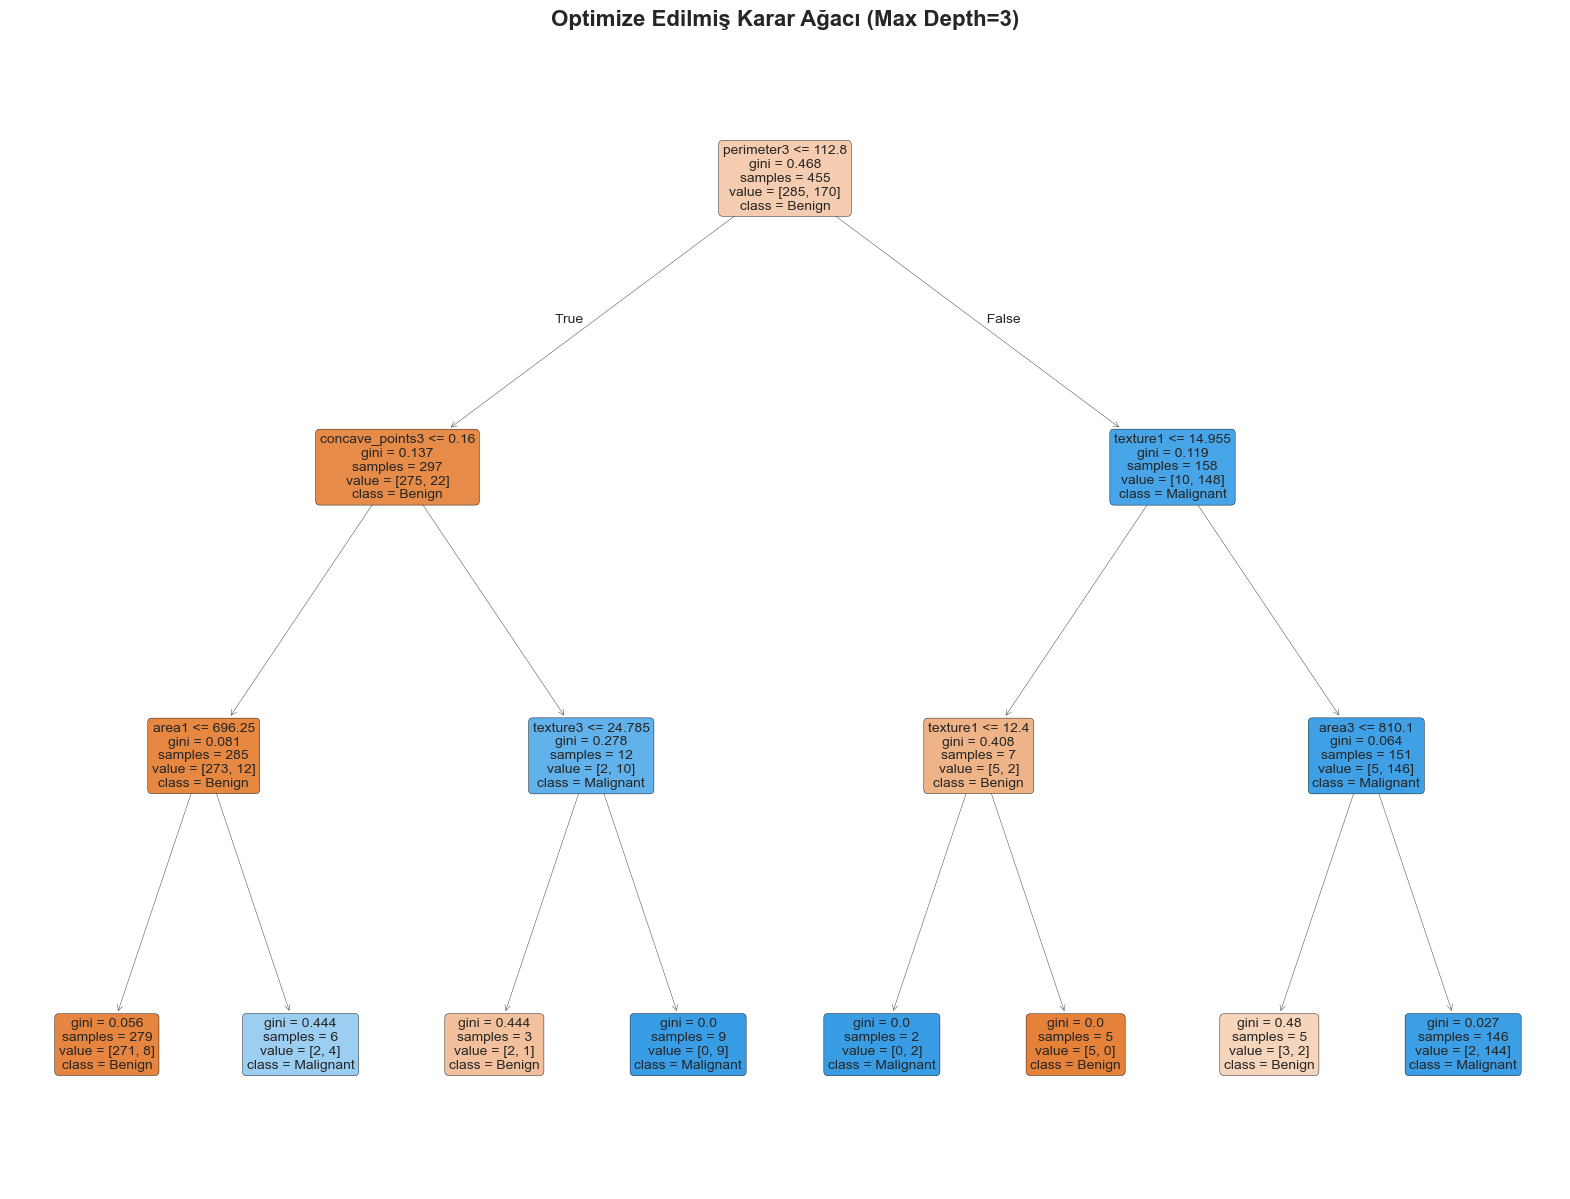

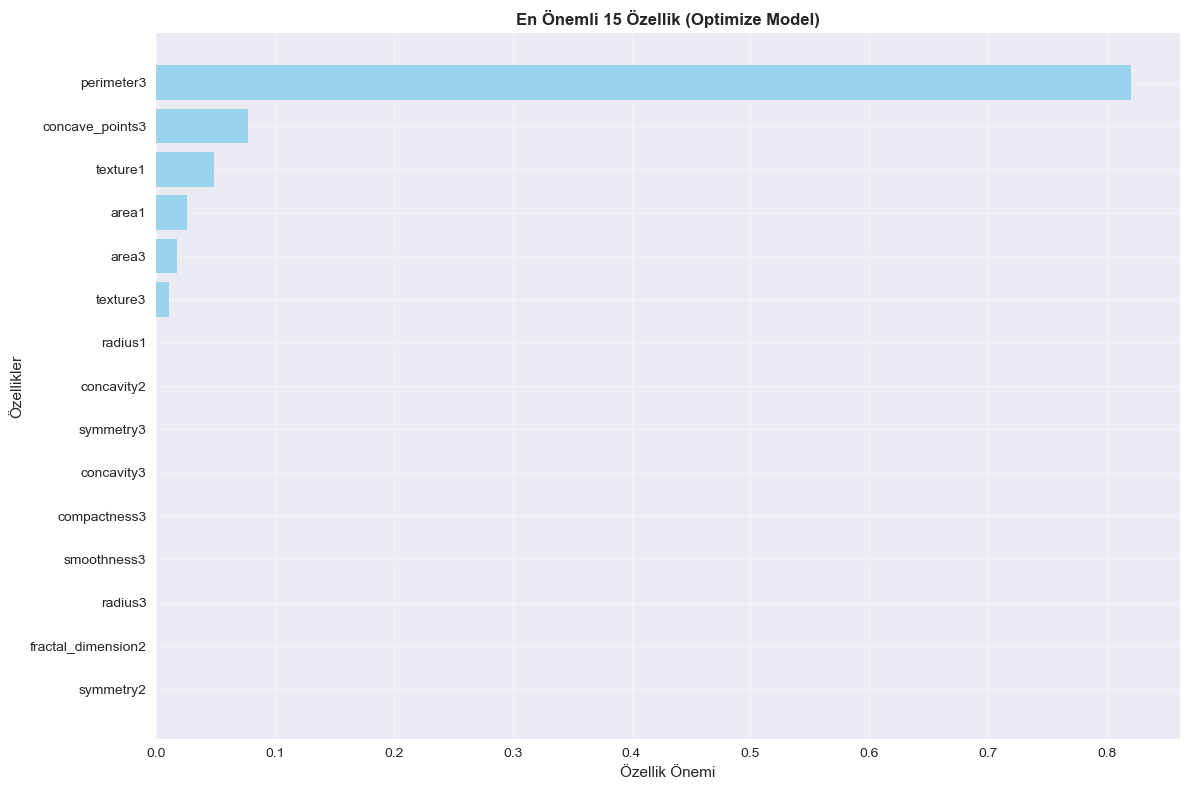

In [37]:
# Figure 3: Decision Tree Visualization (Sadece optimize model iÃ§in)
plt.figure(figsize=(20, 15))
plot_tree(best_dt, filled=True, feature_names=X.columns, 
          class_names=['Benign', 'Malignant'], rounded=True, fontsize=10, max_depth=3)
plt.title("Optimize EdilmiÅŸ Karar AÄŸacÄ± (Max Depth=3)", fontsize=16, fontweight='bold')
plt.show()

# Figure 4: Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='skyblue', alpha=0.8)
plt.xlabel('Ã–zellik Ã–nemi')
plt.ylabel('Ã–zellikler')
plt.title('En Ã–nemli 15 Ã–zellik (Optimize Model)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [32]:
# =============================================================================
# 6. SONUÃ‡ Ã–ZETÄ°
# =============================================================================

print("\n6. SONUÃ‡ Ã–ZETÄ°")
print("=" * 60)

print(f"\nðŸ“Š VERÄ° SETÄ° BÄ°LGÄ°LERÄ°:")
print(f"   â€¢ Toplam Ã¶rnek sayÄ±sÄ±: {X.shape[0]}")
print(f"   â€¢ Ã–zellik sayÄ±sÄ±: {X.shape[1]}")

malignant_count = (y == 'M').sum().iloc[0] if hasattr((y == 'M').sum(), 'iloc') else (y == 'M').sum()
benign_count = (y == 'B').sum().iloc[0] if hasattr((y == 'B').sum(), 'iloc') else (y == 'B').sum()
malignant_pct = (y == 'M').mean().iloc[0] * 100 if hasattr((y == 'M').mean(), 'iloc') else (y == 'M').mean() * 100
benign_pct = (y == 'B').mean().iloc[0] * 100 if hasattr((y == 'B').mean(), 'iloc') else (y == 'B').mean() * 100

print(f"   â€¢ Malignant (KÃ¶tÃ¼ huylu): {malignant_count} (%{malignant_pct:.1f})")
print(f"   â€¢ Benign (Ä°yi huylu): {benign_count} (%{benign_pct:.1f})")

print(f"\nðŸŽ¯ MODEL PERFORMANSI:")
print(f"   Temel Model:")
print(f"     â€¢ Accuracy: {basic_metrics['accuracy']:.4f}")
print(f"     â€¢ F1-Score: {basic_metrics['f1']:.4f}")
print(f"     â€¢ Sensitivity: {basic_metrics['recall']:.4f}")
print(f"     â€¢ Specificity: {basic_metrics['specificity']:.4f}")

print(f"\n   Optimize Model:")
print(f"     â€¢ Accuracy: {best_metrics['accuracy']:.4f}")
print(f"     â€¢ F1-Score: {best_metrics['f1']:.4f}")
print(f"     â€¢ Sensitivity: {best_metrics['recall']:.4f}")
print(f"     â€¢ Specificity: {best_metrics['specificity']:.4f}")

print(f"\nðŸ”§ EN Ä°YÄ° PARAMETRELER:")
for param, value in grid_search.best_params_.items():
    print(f"     â€¢ {param}: {value}")

print(f"\nðŸ“ˆ Ã–NEMLÄ° BULGULAR:")
print(f"   â€¢ En Ã¶nemli Ã¶zellik: {feature_importance.iloc[0]['feature']}")
print(f"   â€¢ ROC AUC (Optimize): {roc_auc_best:.4f}")
print(f"   â€¢ Model, %{best_metrics['recall']*100:.1f} oranÄ±nda kÃ¶tÃ¼ huylu tÃ¼mÃ¶rleri doÄŸru tespit ediyor")
print(f"   â€¢ Model, %{best_metrics['specificity']*100:.1f} oranÄ±nda iyi huylu tÃ¼mÃ¶rleri doÄŸru sÄ±nÄ±flandÄ±rÄ±yor")

print("\n" + "="*60)
print("ANALÄ°Z TAMAMLANDI! ðŸŽ‰")
print("="*60)


6. SONUÃ‡ Ã–ZETÄ°

ðŸ“Š VERÄ° SETÄ° BÄ°LGÄ°LERÄ°:
   â€¢ Toplam Ã¶rnek sayÄ±sÄ±: 569
   â€¢ Ã–zellik sayÄ±sÄ±: 30
   â€¢ Malignant (KÃ¶tÃ¼ huylu): 212 (%37.3)
   â€¢ Benign (Ä°yi huylu): 357 (%62.7)

ðŸŽ¯ MODEL PERFORMANSI:
   Temel Model:
     â€¢ Accuracy: 0.9298
     â€¢ F1-Score: 0.9048
     â€¢ Sensitivity: 0.9048
     â€¢ Specificity: 0.9444

   Optimize Model:
     â€¢ Accuracy: 0.9035
     â€¢ F1-Score: 0.8571
     â€¢ Sensitivity: 0.7857
     â€¢ Specificity: 0.9722

ðŸ”§ EN Ä°YÄ° PARAMETRELER:
     â€¢ criterion: gini
     â€¢ max_depth: 3
     â€¢ min_samples_leaf: 1
     â€¢ min_samples_split: 2

ðŸ“ˆ Ã–NEMLÄ° BULGULAR:
   â€¢ En Ã¶nemli Ã¶zellik: perimeter3
   â€¢ ROC AUC (Optimize): 0.8750
   â€¢ Model, %78.6 oranÄ±nda kÃ¶tÃ¼ huylu tÃ¼mÃ¶rleri doÄŸru tespit ediyor
   â€¢ Model, %97.2 oranÄ±nda iyi huylu tÃ¼mÃ¶rleri doÄŸru sÄ±nÄ±flandÄ±rÄ±yor

ANALÄ°Z TAMAMLANDI! ðŸŽ‰
